In [11]:
import pandas as pd
%matplotlib notebook



In [68]:
def _detick(x):
    if isinstance(x,(float,np.float)):
        return x
    elif x =='\checkmark':
        return 1.0
    else:
        return 0.0
    
with pd.get_store('/dev/shm/top_dt.h5') as s:
    df =pd.concat([s.get(k) for k in s.keys()], keys=[k[1:] for k in s.keys()],
                  names=['Target Behaviour',''])
df = df.applymap(_detick).groupby(level='Target Behaviour').head(10).groupby(level='Target Behaviour').mean()
df

Response Behaviour                                          \
                                MPC       STS    Shadow SlowCoach      Mean   
Target Behaviour                                                              
MPC                        0.893247  0.009559  0.245404  0.540064  0.422069   
Mean                       0.877570  0.022010  0.401729  0.680091  0.495350   
STS                        0.612500  0.057324  0.239124  0.442588  0.337884   
Shadow                     0.689583 -0.002855  0.429311  0.644833  0.440218   
SlowCoach                  0.445842  0.001547  0.385386  0.710089  0.385716   

                 Metrics in Synthetic Domain                              \
                                     $Delay$ $P_{RX}$ $P_{TX}$  $S$  $G$   
Target Behaviour                                                           
MPC                                      0.6      0.3      1.0  0.7  0.2   
Mean                                     0.5      1.0      1.0  0.5  0.6   
STS                                      0.9      0.1      0.7  0.5  0.2   
Shadow                                   0.4      1.0      0.7  0.0  0.2   
SlowCoach                                0.7      0.9      0.0  0.6  0.5   

                                              
                 $PLR$ $INDD$ $INHD$ $Speed$  
Target Behaviour                              
MPC                0.0    0.2    0.9     0.4  
Mean               0.0    0.6    0.0     1.0  
STS                0.8    0.4    0.3     0.3  
Shadow             0.8    1.0    0.6     1.0  
SlowCoach          0.0    0.6    0.0     1.0

<IPython.core.display.Javascript object>


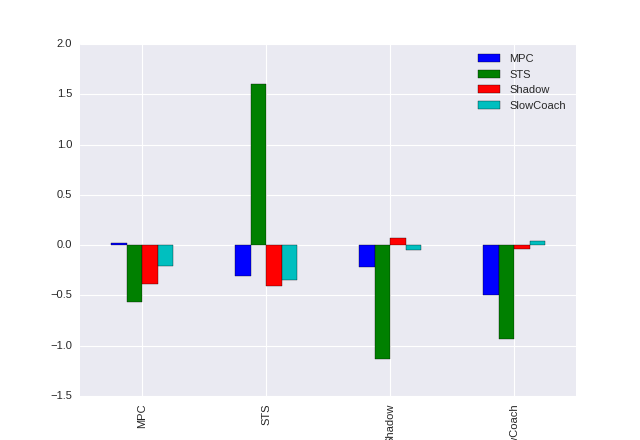

In [78]:
focuses=((df['Response Behaviour']/df['Response Behaviour'].ix['Mean'])-1).drop('Mean', axis=0).drop('Mean', axis=1)
focuses.plot(kind='bar')

<IPython.core.display.Javascript object>


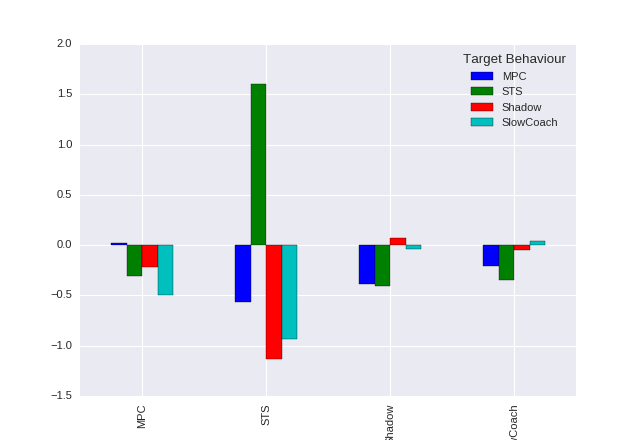

In [79]:
focuses.T.plot(kind='bar')

In [73]:
_diag = lambda df : pd.Series(np.diag(df), index=[df.index])

_diag(focuses)


MPC          1.017864
STS          2.604449
Shadow       1.068660
SlowCoach    1.044109
dtype: float64

In [65]:
tex = df \
    .to_latex(float_format=lambda x: "{0:1.2f}".format(x), escape=False,
              index=False, column_format="|*{{{}}}{{c|}}".format(df.shape[0])) \
    .split('\n')
tex = '\n'.join(tex)
print tex

\begin{tabular}{|*{5}{c|}}
\toprule
Response Behaviour &      &        &           &      & Metrics in Synthetic Domain &          &          &      &      &       &        &        &         \\
               MPC &  STS & Shadow & SlowCoach & Mean &                     $Delay$ & $P_{RX}$ & $P_{TX}$ &  $S$ &  $G$ & $PLR$ & $INDD$ & $INHD$ & $Speed$ \\
                   &      &        &           &      &                             &          &          &      &      &       &        &        &         \\
\midrule
              0.89 & 0.01 &   0.27 &      0.55 & 0.43 &                        0.60 &     0.32 &     1.00 & 0.48 & 0.50 &  0.00 &   0.40 &   0.58 &    0.56 \\
              0.86 & 0.02 &   0.40 &      0.65 & 0.48 &                        0.52 &     0.94 &     0.98 & 0.42 & 0.58 &  0.34 &   0.64 &   0.38 &    0.94 \\
              0.63 & 0.05 &   0.26 &      0.48 & 0.35 &                        0.64 &     0.56 &     0.62 & 0.66 & 0.54 &  0.68 &   0.26 &   0.46 &    0.40 \\
 

In [63]:
df.shape

(5, 14)

<IPython.core.display.Javascript object>


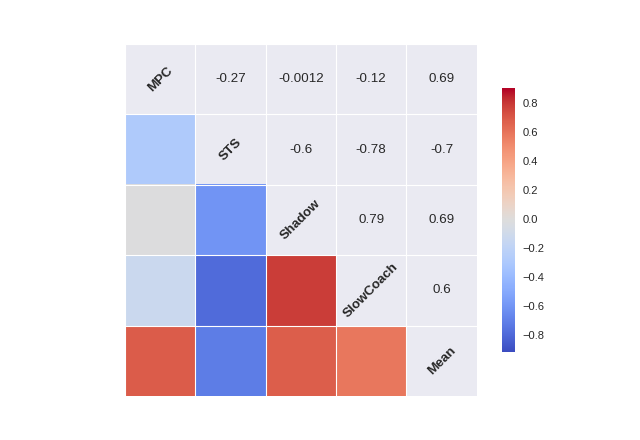

In [52]:
import seaborn as sns
sns.corrplot(df['Response Behaviour'])